# Chapter 3_3.2 Regression

## EXAMPLE 1

### 1. import the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Library for regression
from sklearn import datasets

In [2]:
mydata=datasets.load_diabetes()

In [3]:
# feature columns
df=pd.DataFrame(mydata['data'], columns=mydata['feature_names'])

In [4]:
# target column 추가
df['diabetes_score']=mydata['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_score
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
df.describe().T # T: transpose

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


### 2. data preprocessing

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, shuffle=True, random_state=22)

#### DNN 모델의 하이퍼파라미터
- Dense layer 안의 배치사이즈와 활성화함수, 파라미터 초기화
- hidden layer 의 개수
- BN(BatchNoramlization layer) 추가
- learning rate(0.01, 0.05, 0.001)
- drop out layer 추가

### 3. building model

In [7]:
# Model 1
import tensorflow as tf
model1=tf.keras.Sequential([
    # input layer
    tf.keras.layers.Dense(64, activation='relu', input_dim=len(df.columns)-1),
    
    # hidden layer : 2개, 각 층의 활성화 함수:relu
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(16, activation = "relu"),
 
    # output layer
 tf.keras.layers.Dense(1, activation = "linear")
])

# model compile : 회귀 문제이므로 loss='mse'
model1.compile(optimizer = "adam", loss = "mse", metrics = ['mse'])
# model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


### 4. training model

In [19]:
history=model1.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
9/9 [==============================] - 0s 14ms/step - loss: 2737.0762 - mse: 2737.0762 - val_loss: 3090.3411 - val_mse: 3090.3411
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 2737.7249 - mse: 2737.7249 - val_loss: 3095.1782 - val_mse: 3095.1782
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 2743.7727 - mse: 2743.7727 - val_loss: 3090.4375 - val_mse: 3090.4375
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 2745.5859 - mse: 2745.5859 - val_loss: 3087.1311 - val_mse: 3087.1311
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 2736.3535 - mse: 2736.3535 - val_loss: 3090.3633 - val_mse: 3090.3633
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 2736.9146 - mse: 2736.9146 - val_loss: 3089.1599 - val_mse: 3089.1599
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 2739.8088 - mse: 2739.8088 - val_loss: 3094.1572 - val_mse: 3094.1572
Epoch 8/100


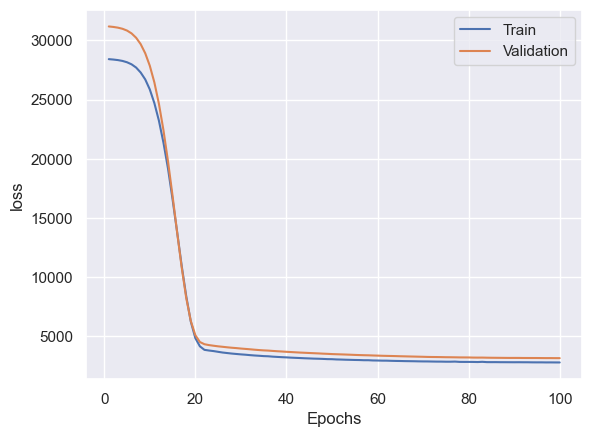

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Loss function
def plot_loss_curve(total_epoch = 10, start = 1):
 
    sns.set_theme(color_codes = True)
 
    plt.figure
    plt.plot(figsize = (15,5))
    plt.plot(range(start, total_epoch +1), history.history['loss'][start-1:total_epoch],
    label = "Train")
    plt.plot(range(start, total_epoch +1), history.history['val_loss'][start-1:total_epoch],
    label = "Validation")
    plt.xlabel("Epochs")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

plot_loss_curve(total_epoch=100, start = 1)

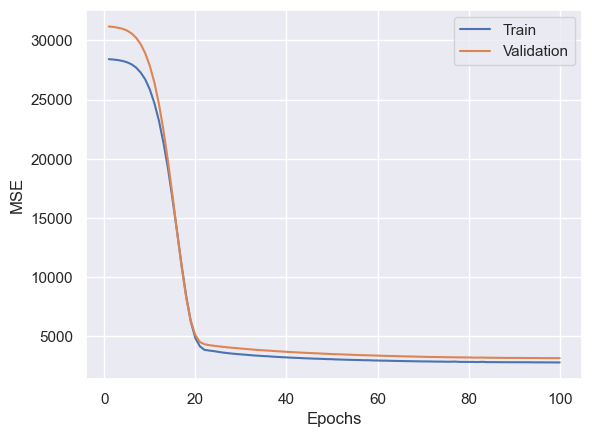

In [10]:
# mse function
def plot_mse_curve(total_epoch = 10, start = 1):
 
    # packge for visualization
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import mean_squared_error
    sns.set_theme(color_codes = True)

    plt.figure
    plt.plot(figsize = (15,5))
    plt.plot(range(start, total_epoch +1), history.history['mse'][start-1:total_epoch], label = "Train")
    plt.plot(range(start, total_epoch +1), history.history['val_mse'][start-1:total_epoch], label = "Validation")
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()
    
plot_mse_curve(total_epoch=100, start = 1)

### 5. test model

In [11]:
res = model1.evaluate(X_test, y_test, verbose = 1)
print('테스트 세트의 MSE : {round(res[1], 4)}')

3/3 [==============================] - 0s 3ms/step - loss: 3277.3413 - mse: 3277.3413
테스트 세트의 MSE : {round(res[1], 4)}


3/3 [==============================] - 0s 0s/step


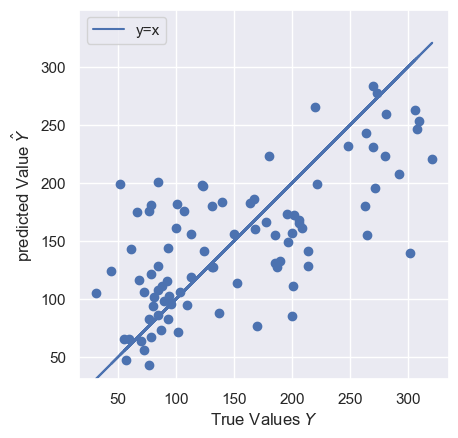

In [12]:
# plot
import matplotlib.pyplot as plt
plt.scatter(y_test, model1.predict(X_test))
plt.xlabel("True Values $Y$")
plt.ylabel("predicted Value $\hat{Y}$")
plt.axis("equal")
plt.axis("square")
plt.plot(y_test, y_test, label = "y=x")
plt.legend()
plt.show()

3/3 [==============================] - 0s 2ms/step


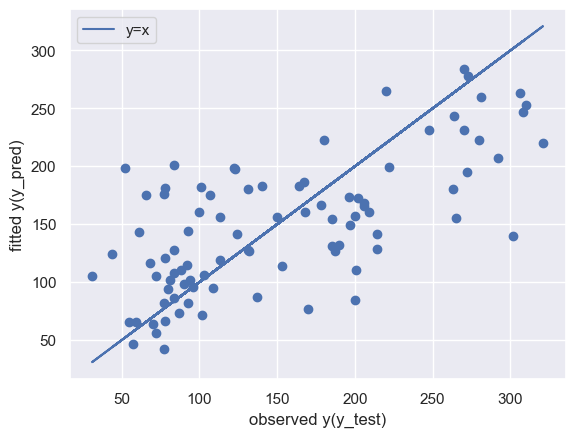

In [13]:
# plot
import matplotlib.pyplot as plt
plt.scatter(y_test, model1.predict(X_test))
plt.xlabel("observed y(y_test)")
plt.ylabel("fitted y(y_pred)")
plt.plot(y_test, y_test, label = "y=x")
plt.legend()
plt.show()

In [14]:
# R_square
from sklearn.metrics import r2_score
score = r2_score(y_test, model1.predict(X_test))
score

3/3 [==============================] - 0s 3ms/step


0.4654188902001948

In [15]:
# Model 2
import tensorflow as tf
model = tf.keras.Sequential([
 # input layer
 tf.keras.layers.Dense(256, activation = "relu", input_dim = (len(df.columns)-1)),
 
 # hidden layer
 tf.keras.layers.Dense(128, activation = "relu"),
 tf.keras.layers.Dense(64, activation = "relu"),
 tf.keras.layers.Dense(32, activation = "relu"),
 tf.keras.layers.Dense(16, activation = "relu"),
 
 # output layer
 tf.keras.layers.Dense(1, activation = "linear")
])
# model compile
model.compile(optimizer = "adam", loss = "mse", metrics = ['mse'])
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               2816      
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 46,593
Trainable params: 46,593
Non-trai

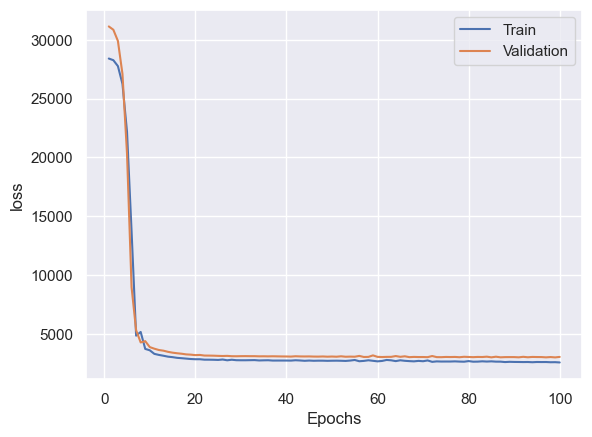

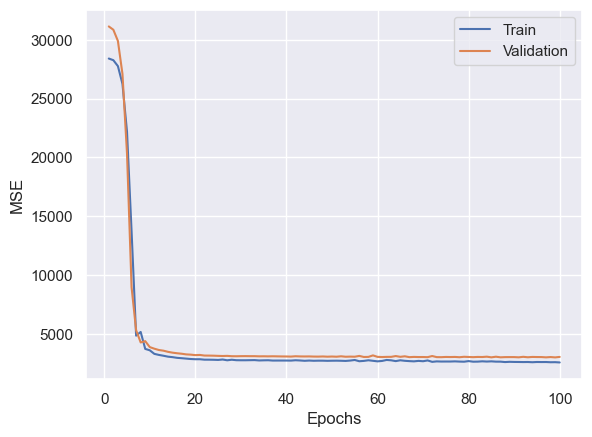

In [16]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.2, verbose = 0)
plot_loss_curve(total_epoch=100, start = 1)
plot_mse_curve(total_epoch=100, start = 1)

In [17]:
# test model
res = model.evaluate(X_test, y_test, verbose = 1)
print(f'테스트 세트의 MSE : {round(res[1], 4)}')

3/3 [==============================] - 0s 2ms/step - loss: 3186.5408 - mse: 3186.5408
테스트 세트의 MSE : 3186.5408


In [ ]:
# obsereved vs fitted plot
import matplotlib.pyplot as plt
plt.scatter(y_test, model.predict(X_test))
plt.xlabel("True Values $Y$")
plt.ylabel("predicted Value $\hat{Y}$")
plt.axis("equal")
plt.axis("square")
plt.plot(y_test, y_test, label = "y=x")
plt.legend()
plt.show()

In [ ]:
# R_square
from sklearn.metrics import r2_score
score = r2_score(y_test, model.predict(X_test))
score

In [ ]:
# Model4
import tensorflow as tf
model = tf.keras.Sequential([
 # input layer
 tf.keras.layers.Dense(256, activation = "relu", input_dim = (len(df.columns)-1),
 kernel_initializer = "he_normal"),
 
 # hidden layer
 tf.keras.layers.Dense(128, activation = "relu"),
 tf.keras.layers.Dense(64, activation = "relu"),
 tf.keras.layers.Dense(32, activation = "relu"),
 tf.keras.layers.Dense(16, activation = "relu"),
 
 # output layer
 tf.keras.layers.Dense(1, activation = "linear")
])
# model compile
model.compile(optimizer = "adam", loss = "mse", metrics = ['mse'])
# model summary
model.summary()

- 성능이 가장 좋았던 Model 2 의 input layer 에 kernel_initializer = "he_normal" 옵션을 추가
->파라미터 초기화 방법

In [ ]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.2,verbose = 0)

In [ ]:
plot_loss_curve(total_epoch=100, start = 1)
plot_mse_curve(total_epoch=100, start = 1)

In [ ]:
# test model
res = model.evaluate(X_test, y_test, verbose = 1)
print(f'테스트 세트의 MSE : {round(res[1], 4)}')

In [ ]:
# obsered vs fitted plot
import matplotlib.pyplot as plt
plt.scatter(y_test, model.predict(X_test))
plt.xlabel("True Values $Y$")
plt.ylabel("predicted Value $\hat{Y}$")
plt.axis("equal")
plt.axis("square")
plt.plot(y_test, y_test, label = "y=x")
plt.legend()
plt.show()

In [ ]:
# R_square
from sklearn.metrics import r2_score
score = r2_score(y_test, model.predict(X_test))
score

> 파라미터 초기화를 이용한 후 R^2 값에 큰 변화가 없음

In [ ]:
# Model5
import tensorflow as tf
model=tf.keras.Sequential([
    # input layer
    tf.keras.layers.Dense(256, activation='relu', input_dim=len(df.columns)-1),
    tf.keras.layers.Dropout(0.2),
    
    # hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # hidden layer 사이에 drop out layer를 추가
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    # output layer
    tf.keras.layers.Dense(1, activation='linear')
])

# model compile
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

model.summary()

In [ ]:
# training model
history=model.fit(X_train, y_train, batch_size=32, epochs=500, validation_split=0.2, verbose=0)

In [ ]:
plot_loss_curve(total_epoch=500, start=1)
plot_mse_curve(total_epoch=500, start=1)

In [ ]:
# test model
res=model.evaluate(X_test, y_test, verbose=1)
print(f'테스트 세트의 MSE: {round(res[1], 4)}')

In [ ]:
# plot
import matplotlib.pyplot as plt

plt.scatter(y_test, model.predict(X_test))
plt.xlabel(' True Values $Y$')
plt.ylabel('predicted Value $\hat{Y}$')
plt.axis('equal')
plt.axis('square')
plt.plot(y_test, y_test, label='y=x')
plt.legend()
plt.show()

In [ ]:
# R_square
from sklearn.metrics import r2_score
score=r2_score(y_test, model.predict(X_test))
score

 > #### 앞서 구한 모델들 중 R_square 값이 가장 큰 값이 가장 좋은 성능

## EXAMPLE 2) Regression Example: Boston-Housing

In [ ]:
# import package
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [ ]:
# 랜덤 시드 고정
SEED = 22
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
import requests
from bs4 import BeautifulSoup
boston_housing=requests.get('http://lib.stat.cmu.edu/datasets/boston')

In [ ]:
from sklearn import datasets
boston_housing = datasets.load_boston()

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2,2]

In [ ]:
target.shape

In [ ]:
raw_df.head()

In [ ]:
df=pd.DataFrame(raw_df)
df.columns=['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO']
df['MEDV']=target
df.head()

## EXAMPLE 3) MPG

In [1]:
# import package
import pathlib
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_theme(color_codes = True)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
# 랜덤 시드 고정
SEED = 22
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']

In [3]:
mydata=pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep=' ', names=column_names, na_values='?', skipinitialspace=True, comment='\t')
mydata.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [5]:
mydata=mydata.dropna()

In [16]:
mydata.head()

,MPG,Displacement,Horsepower,Weight,Acceleration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,18.0,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,15.0,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,18.0,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,16.0,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,17.0,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0


In [6]:
#원핫인코딩
mydata = pd.get_dummies(data = mydata, columns = ['Cylinders', 'Origin'], prefix = ['Cylinders','Origin'])

In [7]:
# X,Y,train,test split
X = mydata.iloc[:, 1:]
Y = mydata.iloc[:, 0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state = SEED)

In [8]:
# feature scaling
from sklearn import preprocessing
# normalization
minmax_scaler = preprocessing.MinMaxScaler()
norm_fit = minmax_scaler.fit(X_train)
X_train_norm = norm_fit.transform(X_train)
X_test_norm = norm_fit.transform(X_test)
# standardization
standard_scaler = preprocessing.StandardScaler()
stan_fit = standard_scaler.fit(X_train)
X_train_stan = stan_fit.transform(X_train)
X_test_stan = stan_fit.transform(X_test)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = tf.keras.Sequential([
 
 # hidden layer
 tf.keras.layers.Dense(64, activation = 'relu', input_shape = (13,)),
 tf.keras.layers.Dense(64, activation = 'relu'),
 
 # output layer
 tf.keras.layers.Dense(1, activation = 'linear')
])
model.compile(optimizer = tf.keras.optimizers.RMSprop(0.001), loss = 'mse',
 metrics = ['mae', 'mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train_norm, y_train, epochs = 1000, validation_split = 0.2, verbose = 1)

Epoch 1/1000
8/8 [==============================] - 1s 36ms/step - loss: 608.3451 - mae: 23.3922 - mse: 608.3451 - val_loss: 593.4285 - val_mae: 23.3898 - val_mse: 593.4285
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 570.7980 - mae: 22.5706 - mse: 570.7980 - val_loss: 556.0898 - val_mae: 22.5703 - val_mse: 556.0898
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 533.8896 - mae: 21.7196 - mse: 533.8896 - val_loss: 517.6912 - val_mae: 21.6847 - val_mse: 517.6912
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 494.1670 - mae: 20.7506 - mse: 494.1670 - val_loss: 474.3194 - val_mae: 20.6366 - val_mse: 474.3194
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 448.0738 - mae: 19.5934 - mse: 448.0738 - val_loss: 424.5337 - val_mae: 19.3654 - val_mse: 424.5337
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 397.2579 - mae: 18.1926 - mse: 397.2579 - val_loss: 370.9703 - val_

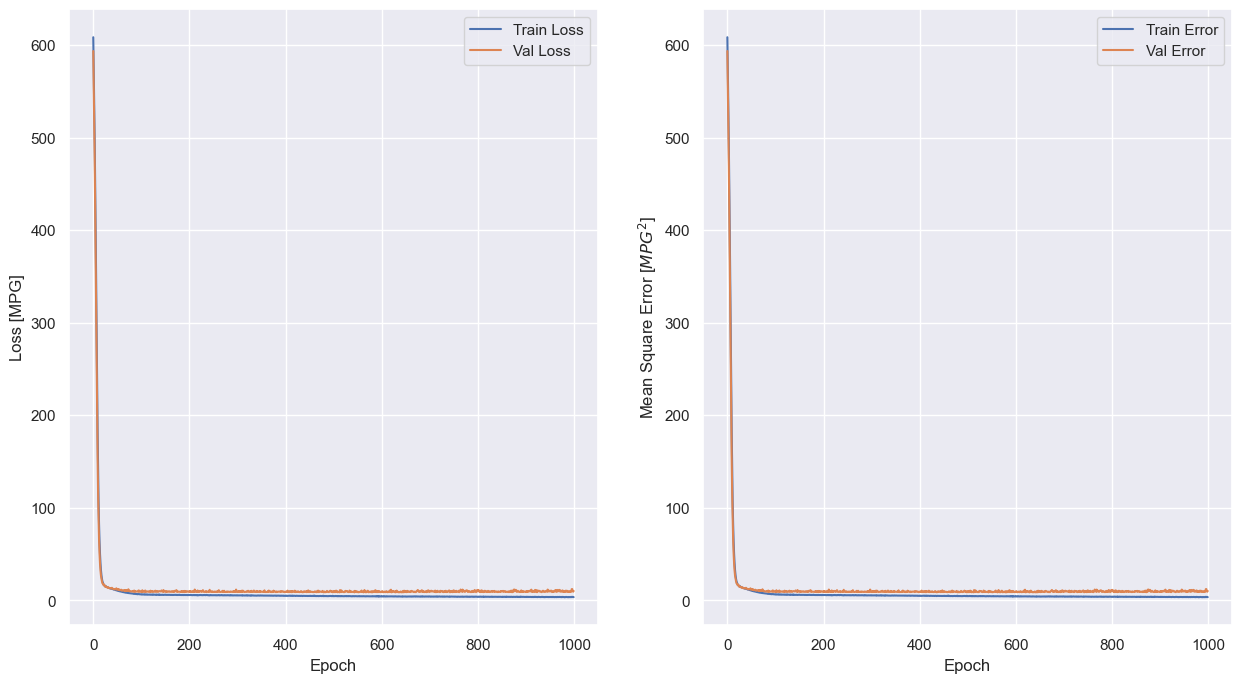

In [11]:
import matplotlib.pyplot as plt
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
 
    plt.figure(figsize=(15,8))
 
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss [MPG]')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.show()
    
plot_history(history)

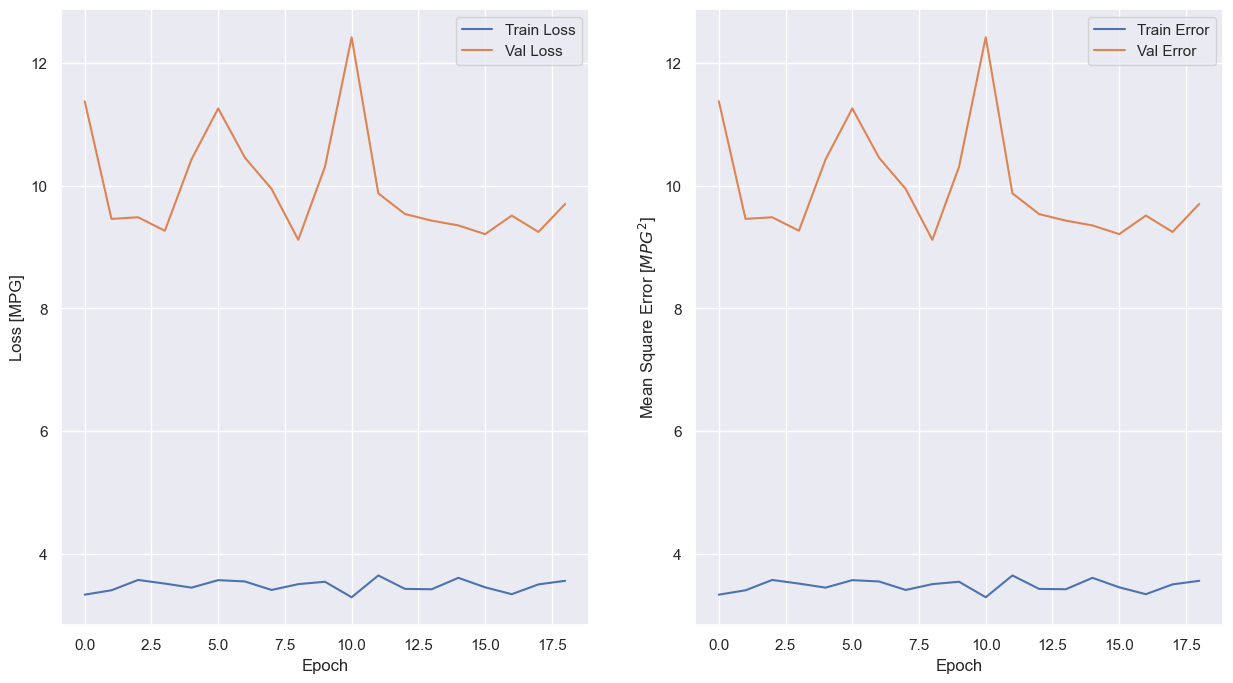

In [12]:
# patience 매개변수는 성능 향상을 체크할 에포크 횟수
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_norm, y_train, epochs=100, validation_split = 0.2, verbose=0, callbacks=[early_stop])
plot_history(history)

In [13]:
loss, mae, mse = model.evaluate(X_train_norm, y_train, verbose=2)
print(f"테스트 세트의 MSE: {round(mse,3)} MPG")

10/10 - 0s - loss: 4.5284 - mae: 1.4521 - mse: 4.5284 - 40ms/epoch - 4ms/step
테스트 세트의 MSE: 4.528 MPG


3/3 [==============================] - 0s 8ms/step


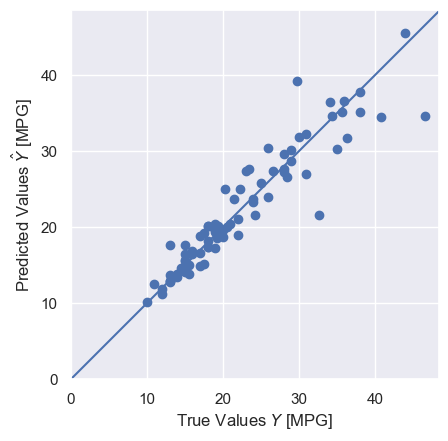

In [14]:
# test set에 있는 샘플 사용해 MPG 예측
test_predictions = model.predict(X_test_norm).flatten()
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values $Y$ [MPG]')
plt.ylabel('Predicted Values $\hat{Y}$ [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [15]:
# r2_score
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, test_predictions)
r2_y_predict

0.8775523136736735

In [ ]:
from sklearn.metrics import accuracy_score

# 3. Classification

## Example 1) wine_type

In [84]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
sns.set_theme(color_codes = True)
SEED = 22
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [85]:
red=pd.read_csv('winequality-red.csv', sep=';')
white=pd.read_csv('winequality-white.csv', sep=';')

In [86]:
## data preprocessing
# 새로운 변수로 'type'을 설정 후 red -> 0, white -> 1 로 할당
red['type'] = 0
white['type'] = 1
# 데이터 병합
wine = pd.concat([red, white])
wine_copied = wine.copy()
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0


In [80]:
print(wine.shape)

(6497, 13)


In [81]:
wine.info() # 결측치 존재 X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [82]:
# quality => 3, 4, 5, 6, 7, 8, 9 
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [83]:
# OneHotEncoder: quality는 범주형 변수이므로 원핫 인코딩 필요 
wine = pd.get_dummies(data = wine, columns = ['quality', 'type'], prefix = ['quality', 'type'])

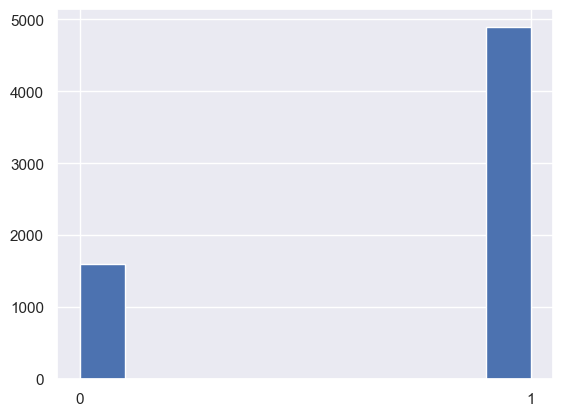

In [66]:
# 히스토그램 이용하여 레드 와인(type==0)과 화이트 와인(type==1)의 개수 확인
plt.hist(wine_copied['type'])
plt.xticks([0, 1])
plt.show()

In [67]:
wine_copied['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [68]:
# train/test split
X = wine.iloc[:, :-2]
y = wine.iloc[:,-2:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = SEED)

In [69]:
# feature scaling
from sklearn import preprocessing
# normalization
minmax_scaler = preprocessing.MinMaxScaler()
norm_fit = minmax_scaler.fit(X_train)
X_train_norm = norm_fit.transform(X_train)
X_test_norm = norm_fit.transform(X_test)

# standardization
standard_scaler = preprocessing.StandardScaler()
stan_fit = standard_scaler.fit(X_train)
X_train_stan = stan_fit.transform(X_train)
X_test_stan = stan_fit.transform(X_test)

In [71]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality_3             6497 non-null   uint8  
 12  quality_4             6497 non-null   uint8  
 13  quality_5             6497 non-null   uint8  
 14  quality_6             6497 non-null   uint8  
 15  quality_7            

In [70]:
# 분류 모델은 마지막 계층의 활성화 함수로 소프트맥스(softmax) 함수를 사용
# 소프트맥스 함수의 출력값의 합은 1.0이기 때문에 분류(확률 계산)에 있어서 유리

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = tf.keras.Sequential([
 
 # hidden layer
 tf.keras.layers.Dense(units=48, activation='relu', input_shape=(18,)), # input_shape = number of feature
 tf.keras.layers.Dense(units=24, activation='relu'),
 tf.keras.layers.Dense(units=12, activation='relu'),
 
 # output layer
 tf.keras.layers.Dense(units=2, activation='softmax')
])
# model compile
# 분류 문제의 경우 손실함수는 categorical crossentropy
# 분류 문제는 정확도로 퍼포먼스를 측정하기 때문에 metrics=['accuracy']를 반드시 설정
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 48)                912       
                                                                 
 dense_17 (Dense)            (None, 24)                1176      
                                                                 
 dense_18 (Dense)            (None, 12)                300       
                                                                 
 dense_19 (Dense)            (None, 2)                 26        
                                                                 
Total params: 2,414
Trainable params: 2,414
Non-trainable params: 0
_________________________________________________________________


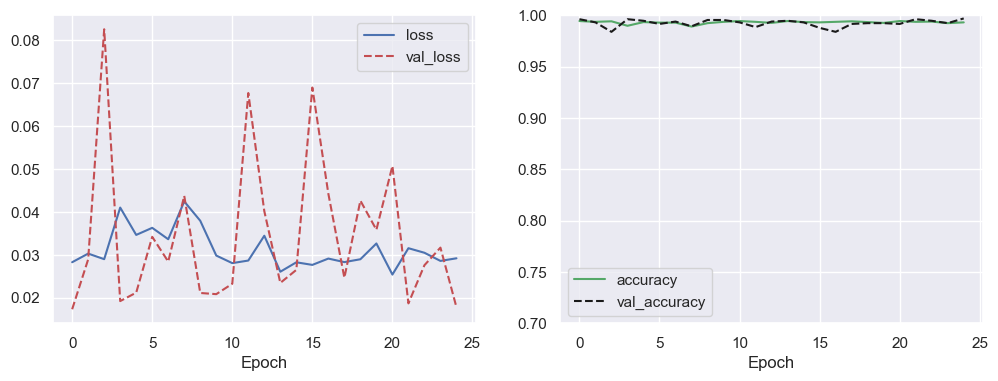

In [32]:
# Training model& Test model
### minmax normalization data

# wine_norm
history = model.fit(X_train_norm, y_train, epochs=25, batch_size=32, validation_split=0.25, verbose = 0)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()
plt.show()

In [33]:
loss, acc = model.evaluate(X_test_norm, y_test)
acc

41/41 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.9969


0.9969230890274048

In [34]:
# wine = 1, red = 0 인 type_1 column 추출
y_test_c = y_test.iloc[:, 1]
# 0.9 이상인 확률은 1, 아닐 경우 0
predictions = model.predict(X_test_norm)
y_pred = (predictions > 0.9)
# confusion matrix
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test_c, y_pred.argmax(axis = 1))
matrix

41/41 [==============================] - 0s 2ms/step


array([[312,   3],
       [  2, 983]], dtype=int64)

In [35]:
import pandas as pd
table = pd.DataFrame(matrix, columns = ["red", "white"], index = ["red", "white"])
table

,white,red
white,312,3
red,2,983


Epoch 1/25
122/122 [==============================] - 1s 5ms/step - loss: 0.5624 - accuracy: 0.7506 - val_loss: 0.5525 - val_accuracy: 0.7592
Epoch 2/25
122/122 [==============================] - 1s 4ms/step - loss: 0.5635 - accuracy: 0.7506 - val_loss: 0.5532 - val_accuracy: 0.7592
Epoch 3/25
122/122 [==============================] - 1s 4ms/step - loss: 0.5632 - accuracy: 0.7506 - val_loss: 0.5520 - val_accuracy: 0.7592
Epoch 4/25
122/122 [==============================] - 1s 4ms/step - loss: 0.5628 - accuracy: 0.7506 - val_loss: 0.5529 - val_accuracy: 0.7592
Epoch 5/25
122/122 [==============================] - 1s 4ms/step - loss: 0.5639 - accuracy: 0.7506 - val_loss: 0.5523 - val_accuracy: 0.7592
Epoch 6/25
122/122 [==============================] - 1s 4ms/step - loss: 0.5633 - accuracy: 0.7506 - val_loss: 0.5530 - val_accuracy: 0.7592
Epoch 7/25
122/122 [==============================] - 1s 4ms/step - loss: 0.5624 - accuracy: 0.7506 - val_loss: 0.5521 - val_accuracy: 0.7592
Epoch 

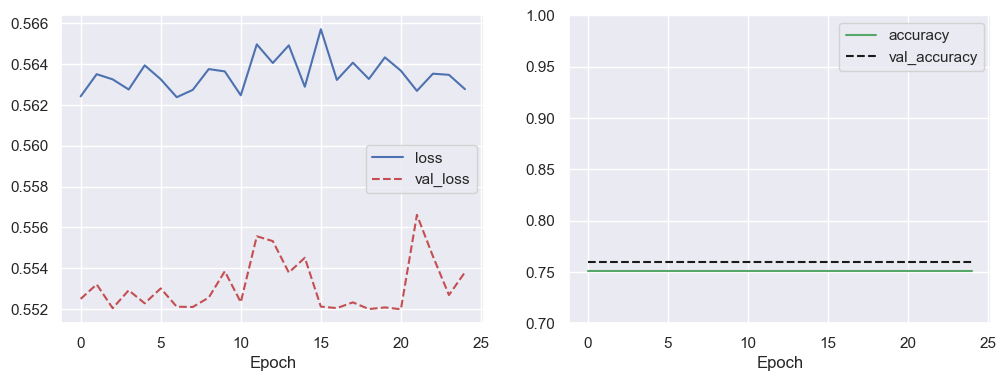

In [44]:
### Standardized data
# wine_stan
history = model.fit(X_train_stan, y_train, epochs=25, batch_size=32, validation_split=0.25,
verbose = 1)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()
plt.show()

In [45]:
loss, acc = model.evaluate(X_test_stan, y_test)
acc

41/41 [==============================] - 0s 3ms/step - loss: 0.5546 - accuracy: 0.7585


0.7584615349769592

> - test data에서 accuracy가 99%인 normalization data의 training model performance가 가장 좋음
> - confusion matrix 통해서 오분류된 개수 확인

In [46]:
# wine = 1, red = 0 인 type_1 column 추출
y_test_c = y_test.iloc[:, 1]
# 0.9 이상인 확률은 1, 아닐 경우 0
predictions = model.predict(X_test_stan)
y_pred = (predictions > 0.9)
# confusion matrix
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test_c, y_pred.argmax(axis = 1))
matrix

41/41 [==============================] - 0s 2ms/step


array([[314,   0],
       [986,   0]], dtype=int64)

In [47]:
import pandas as pd
table = pd.DataFrame(matrix, columns = ["white", "red"], index = ["white", "red"])
table

,white,red
white,314,0
red,986,0


## Example 2) wine_quality

In [74]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
sns.set_theme(color_codes = True)
SEED = 22
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [87]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


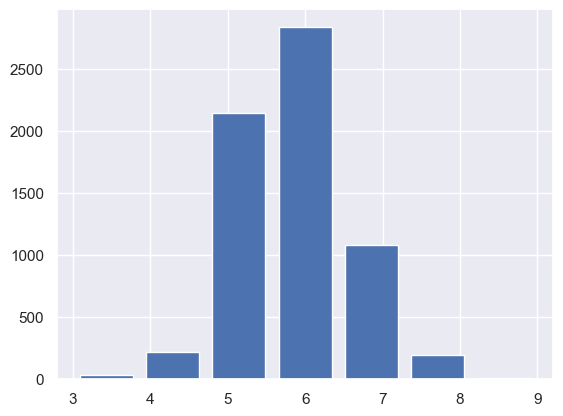

In [88]:
# 품질 histogram
plt.hist(wine['quality'],bins=7, rwidth=0.8)
plt.show()

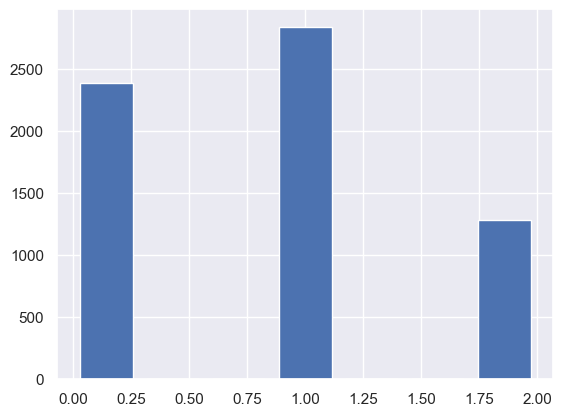

In [89]:
# 품질을 세개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2
# histogram
plt.hist(wine['new_quality'], bins=7, rwidth=0.8)
plt.show()

In [90]:
# 기존의 quality 제거
wine = wine.drop("quality", axis = 1)

In [91]:
# OneHotEncoder
wine = pd.get_dummies(data = wine, columns = ['new_quality'], prefix = ['new_quality'])
# train/test split
X = wine.iloc[:, :-3]
y = wine.iloc[:,-3:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = SEED)

In [92]:
# feature scaling
from sklearn import preprocessing
# normalization
minmax_scaler = preprocessing.MinMaxScaler()
norm_fit = minmax_scaler.fit(X_train)
X_train_norm = norm_fit.transform(X_train)
X_test_norm = norm_fit.transform(X_test)

# standardization
standard_scaler = preprocessing.StandardScaler()
stan_fit = standard_scaler.fit(X_train)
X_train_stan = stan_fit.transform(X_train)
X_test_stan = stan_fit.transform(X_test)

In [97]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   int64  
 12  new_quality_0.0       6497 non-null   uint8  
 13  new_quality_1.0       6497 non-null   uint8  
 14  new_quality_2.0       6497 non-null   uint8  
dtypes: float64(11), int64

In [98]:
# building model
model = tf.keras.Sequential([
 tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
 tf.keras.layers.Dense(units=24, activation='relu'),
 tf.keras.layers.Dense(units=12, activation='relu'),
 tf.keras.layers.Dense(units=3, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 48)                624       
                                                                 
 dense_25 (Dense)            (None, 24)                1176      
                                                                 
 dense_26 (Dense)            (None, 12)                300       
                                                                 
 dense_27 (Dense)            (None, 3)                 39        
                                                                 
Total params: 2,139
Trainable params: 2,139
Non-trainable params: 0
_________________________________________________________________


In [99]:
# training&testing model
history = model.fit(X_train_norm, y_train, epochs=100, batch_size=1, validation_split=0.25, verbose = 0)

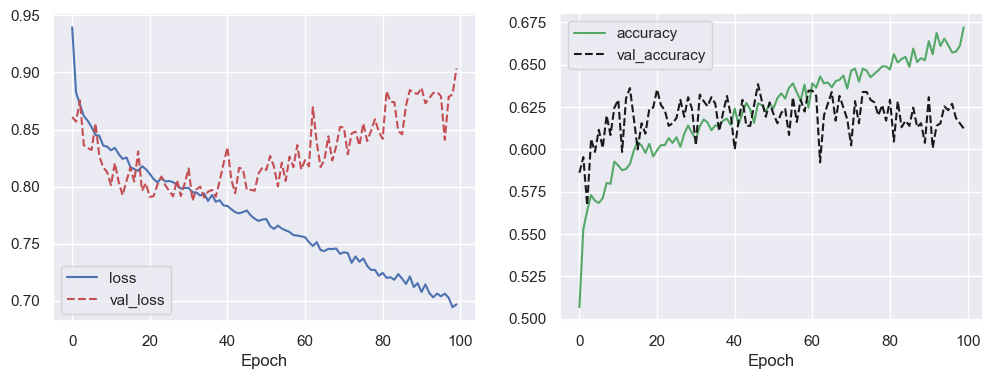

In [100]:
# 다항 분류 모델 학습 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [101]:
# 다항 분류 모델 평가
model.evaluate(X_test_norm, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.8824 - accuracy: 0.6077


[0.8823837637901306, 0.607692301273346]

In [102]:
# confusion matrix for 다항분류
from sklearn import metrics
predictions=model.predict(X_test_norm)

y_pred=np.argmax(predictions, axis=1)
y_test_c=np.argmax(np.array(y_test), axis=1)
matrix=metrics.confusion_matrix(y_test_c, y_pred)
matrix

41/41 [==============================] - 0s 2ms/step


array([[316, 150,   4],
       [152, 370,  56],
       [  8, 140, 104]], dtype=int64)

In [103]:
loss, acc = model.evaluate(X_test_norm, y_test)
acc

41/41 [==============================] - 0s 2ms/step - loss: 0.8824 - accuracy: 0.6077


0.607692301273346